# Problem Statement

In [13]:
#To analyze employee data and identify key factors responsible for employee attrition, focusing on salary, experience, and department-wise exits, 
#in order to help organizations reduce turnover and improve retention.

# Import the required libraries and dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns

#load the dataset
df = pd.read_csv(r"C:\Users\Ayesha\OneDrive\Documents\Desktop\EDA\Employee Attrition Analysis\employee_dataset.csv")

============================================================================
SECTION 1: DATA OVERVIEW & QUALITY ASSESSMENT
============================================================================

In [23]:
print("\n" + "="*80)
print("SECTION 1: DATA OVERVIEW & QUALITY ASSESSMENT")
print("="*80)

# 1.1 Dataset Dimensions
print(f"\n1.1 Dataset Dimensions")
print(f"{'─'*50}")
print(f"Number of Rows: {df.shape[0]:,}")
print(f"Number of Columns: {df.shape[1]}")


SECTION 1: DATA OVERVIEW & QUALITY ASSESSMENT

1.1 Dataset Dimensions
──────────────────────────────────────────────────
Number of Rows: 1,470
Number of Columns: 35


In [24]:
# Data Types
print(f"\n1.2 Data Types")
print(f"{'─'*50}")
print(df.dtypes)


1.2 Data Types
──────────────────────────────────────────────────
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours          

In [17]:
# Missing Values Analysis
print(f"\n1.3 Missing Values Analysis")
print(f"{'─'*50}")

missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Percentage': missing_percentages
})

if missing_df['Missing_Count'].sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(missing_df[missing_df['Missing_Count'] > 0])


1.3 Missing Values Analysis
──────────────────────────────────────────────────
✓ No missing values found in the dataset!


In [18]:
# Duplicate Records
print(f"\n1.4 Duplicate Records")
print(f"{'─'*50}")

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


1.4 Duplicate Records
──────────────────────────────────────────────────
Number of duplicate rows: 0


In [19]:
# Basic Statistical Summary
print(f"\n1.5 Basic Statistical Summary")
print(f"{'─'*50}")
print(df.describe())


1.5 Basic Statistical Summary
──────────────────────────────────────────────────
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306         

In [20]:
# Categorical Variables Summary
print(f"\n1.6 Categorical Variables Summary")
print(f"{'─'*50}")

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


1.6 Categorical Variables Summary
──────────────────────────────────────────────────

Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resour

# ============================================================================
SECTION 2: UNIVARIATE ANALYSIS - NUMERICAL VARIABLES
============================================================================


SECTION 2: UNIVARIATE ANALYSIS - NUMERICAL VARIABLES

Numerical Columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_binary',
       'Income_per_YearAtCompany'],
      dtype='object')


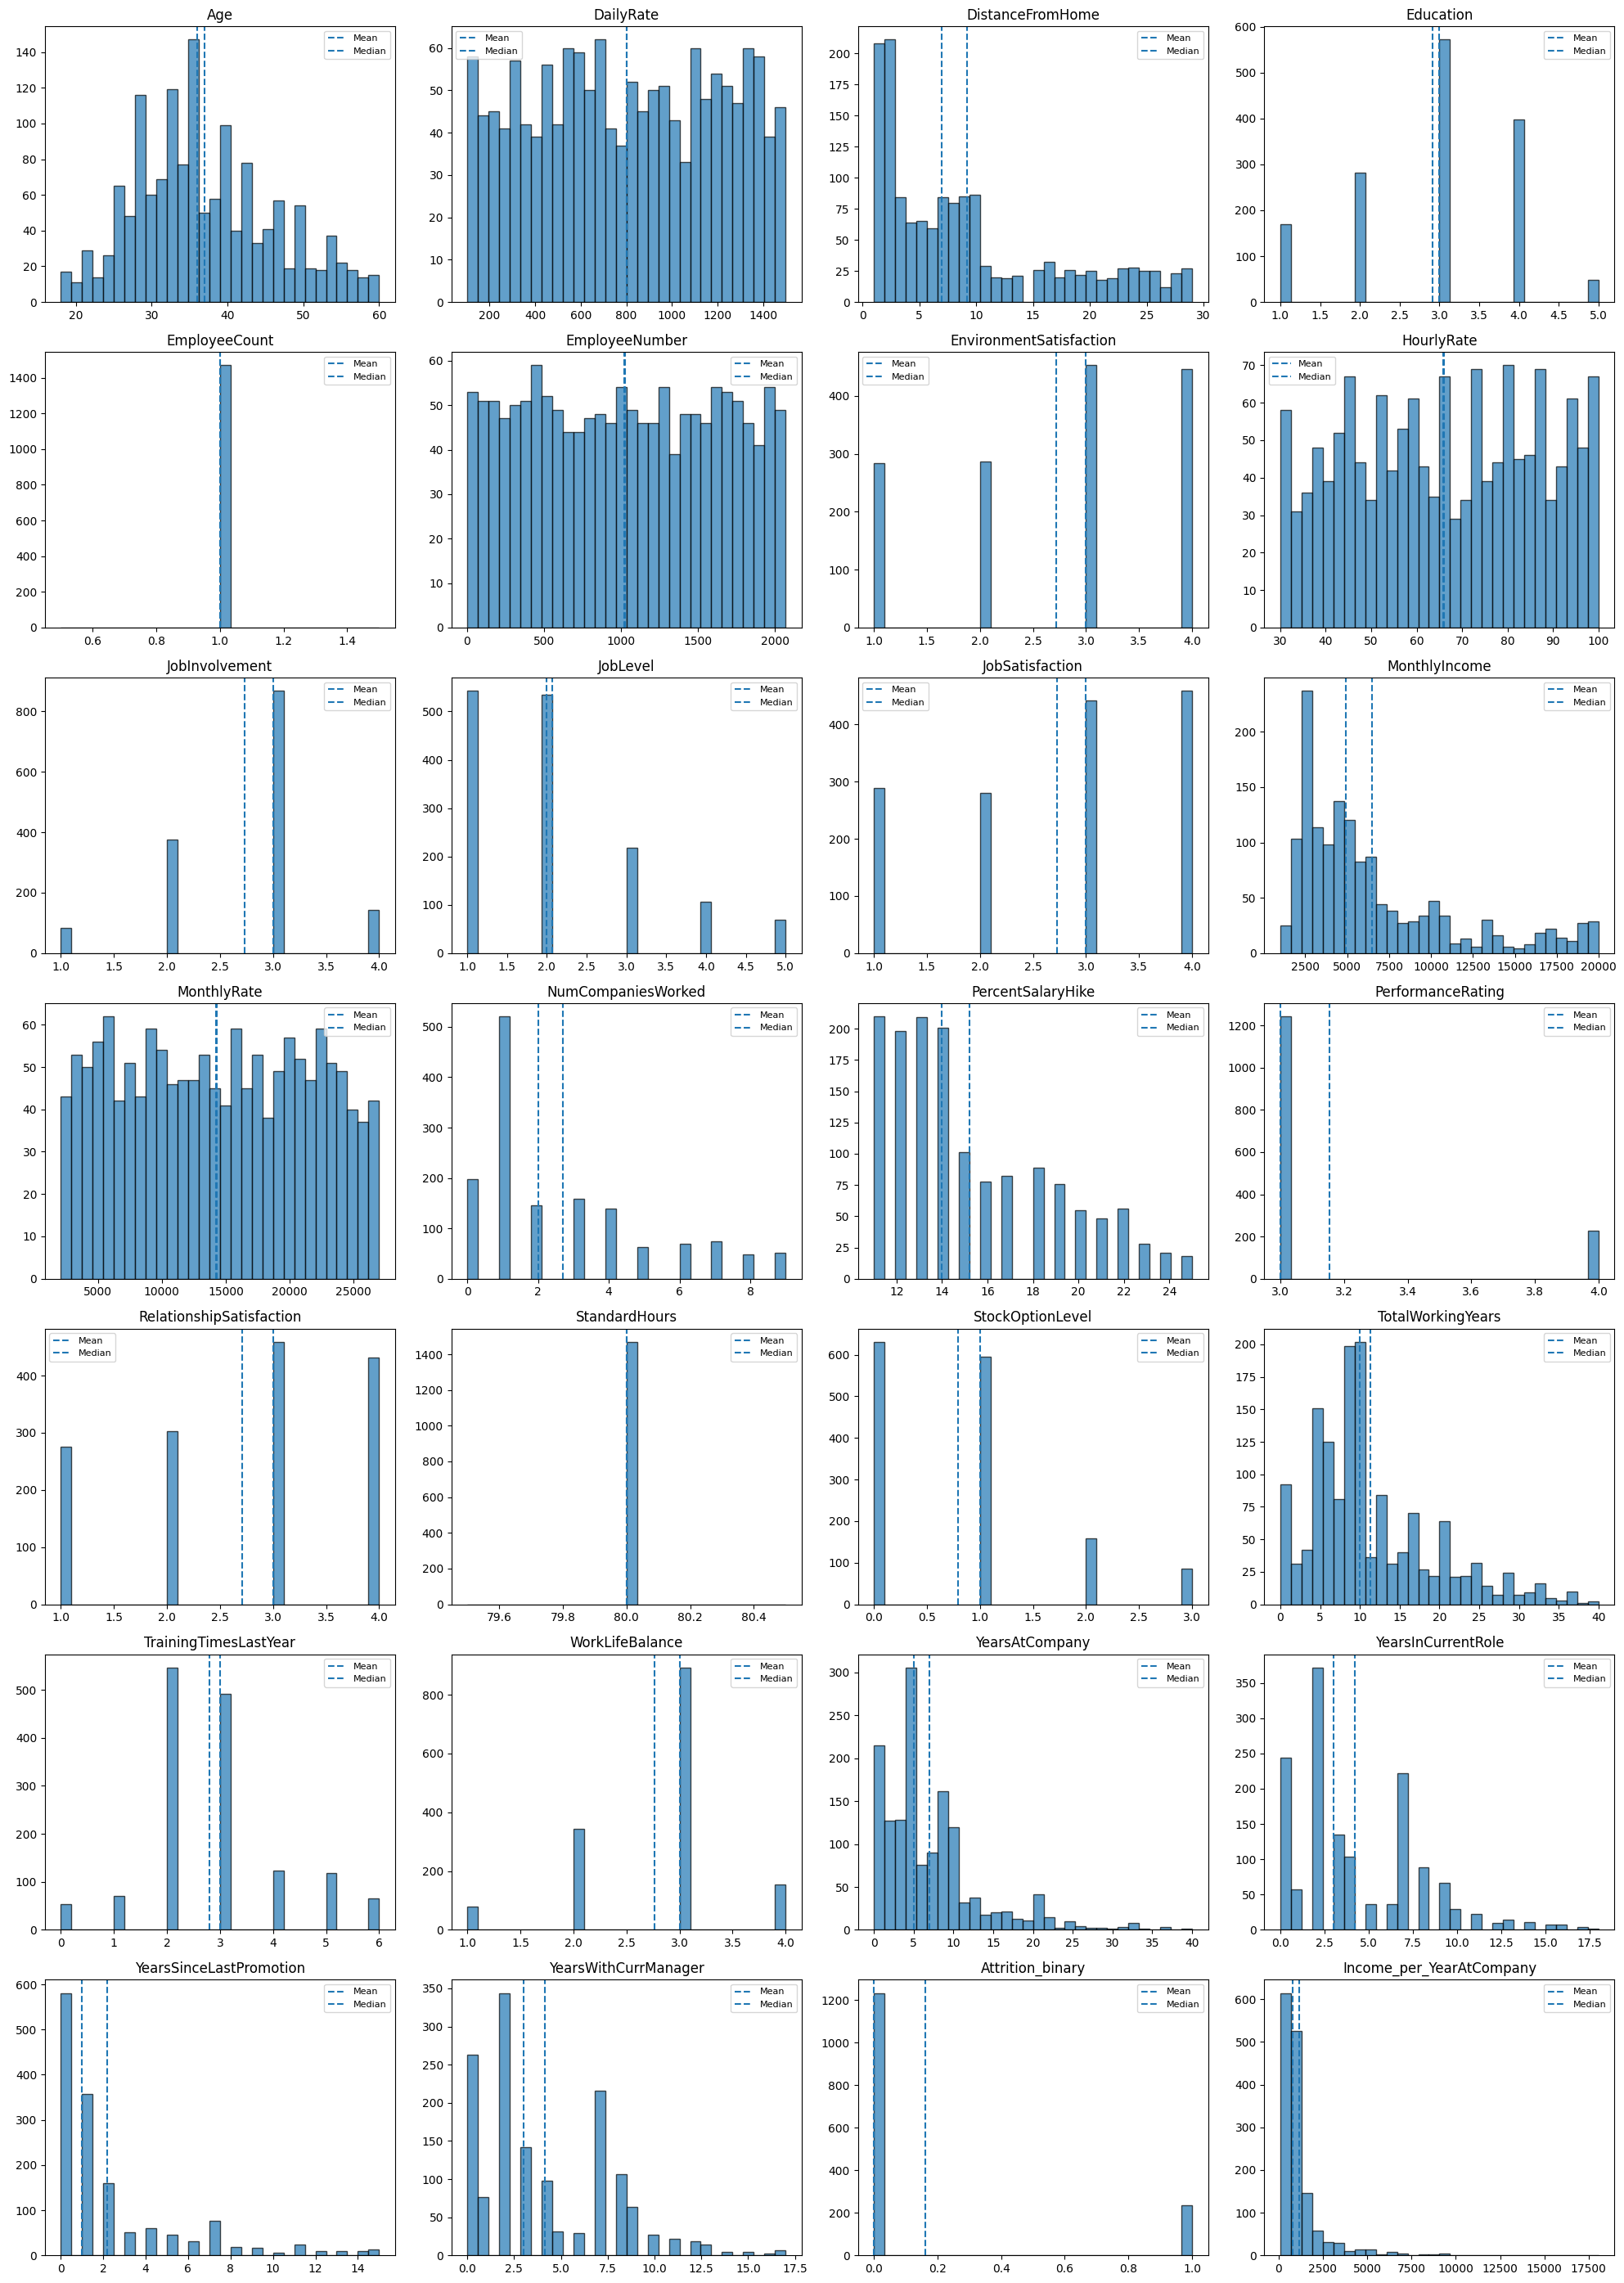

✓ Saved: univariate_distributions.png


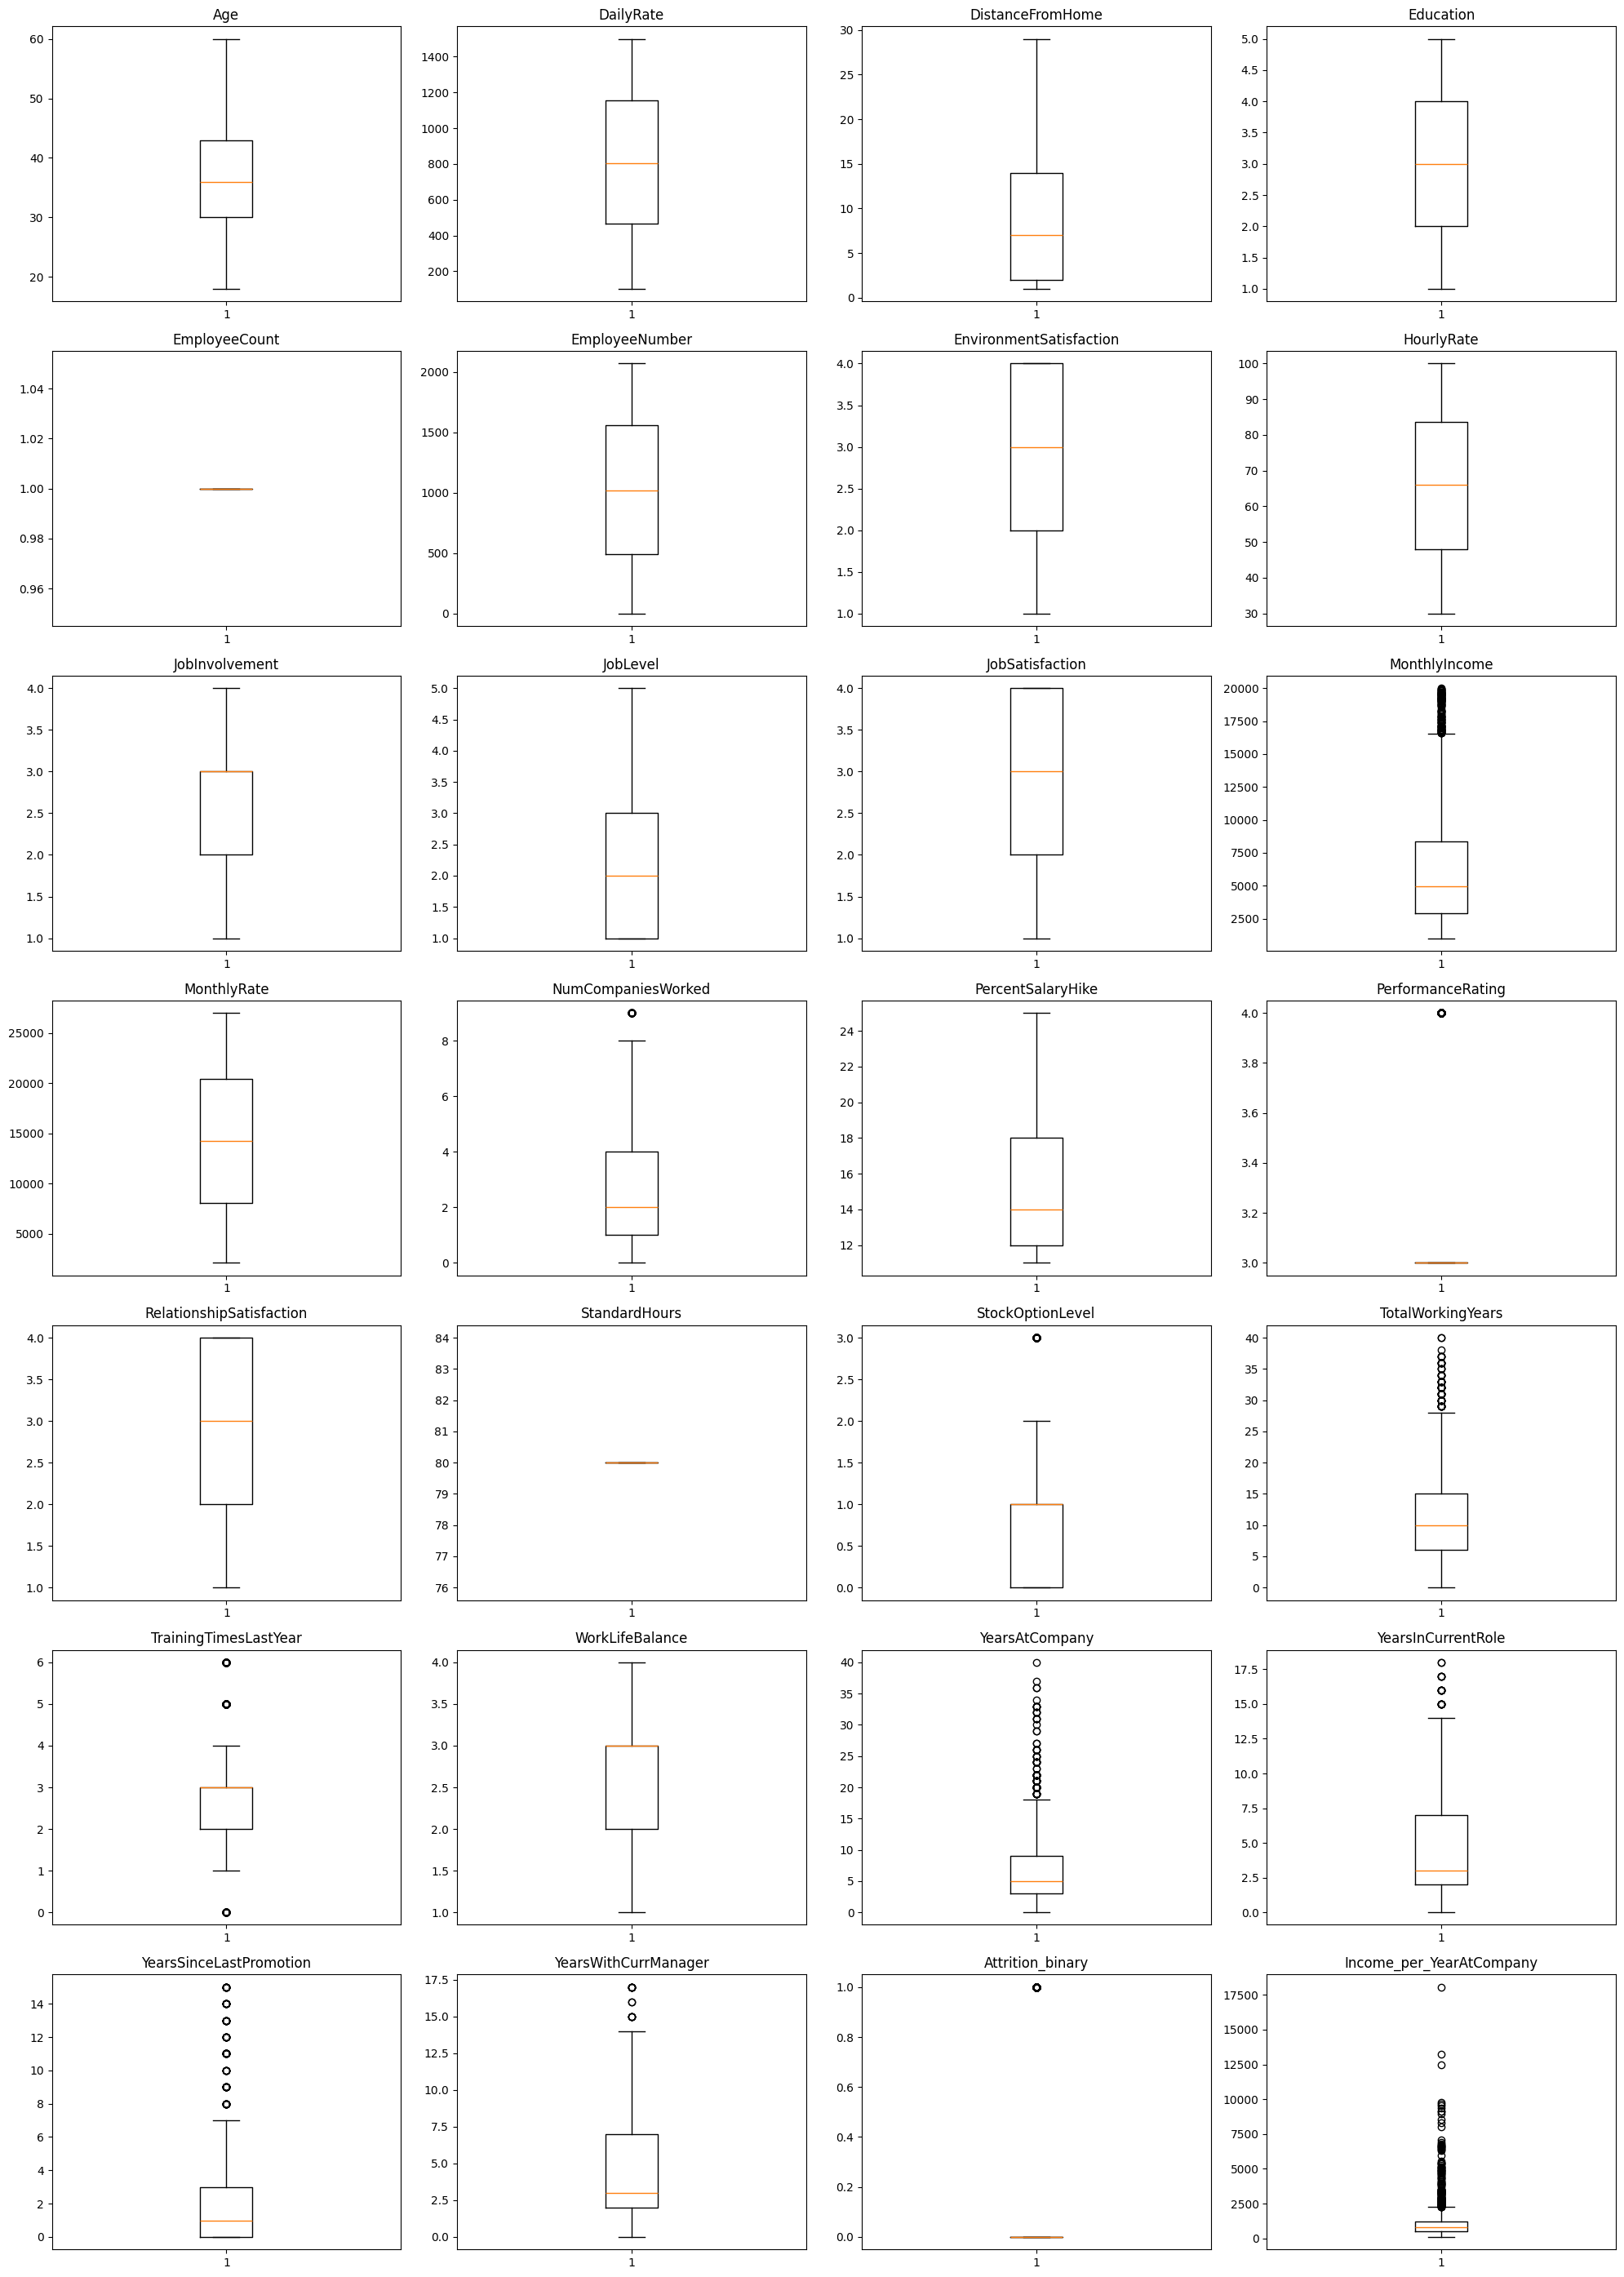

✓ Saved: boxplots_outliers.png


In [41]:
print("\n" + "="*80)
print("SECTION 2: UNIVARIATE ANALYSIS - NUMERICAL VARIABLES")
print("="*80)

# Automatically select numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print("\nNumerical Columns:")
print(numerical_cols)

# -----------------------------
# HISTOGRAMS (Distributions)
# -----------------------------
rows = int(np.ceil(len(numerical_cols)/4))
fig, axes = plt.subplots(rows, 4, figsize=(20, rows*4))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].axvline(df[col].mean(), linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), linestyle='--', label='Median')
    axes[i].set_title(col)
    axes[i].legend(fontsize=8)

# Remove empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("univariate_distributions.png", dpi=300)
plt.show()

print("✓ Saved: univariate_distributions.png")

# -----------------------------
# BOXPLOTS (Outliers)
# -----------------------------
fig, axes = plt.subplots(rows, 4, figsize=(20, rows*4))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("boxplots_outliers.png", dpi=300)
plt.show()

print("✓ Saved: boxplots_outliers.png")


# ============================================================================
SECTION 3: UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES
============================================================================


SECTION 3: UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES

Categorical Columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


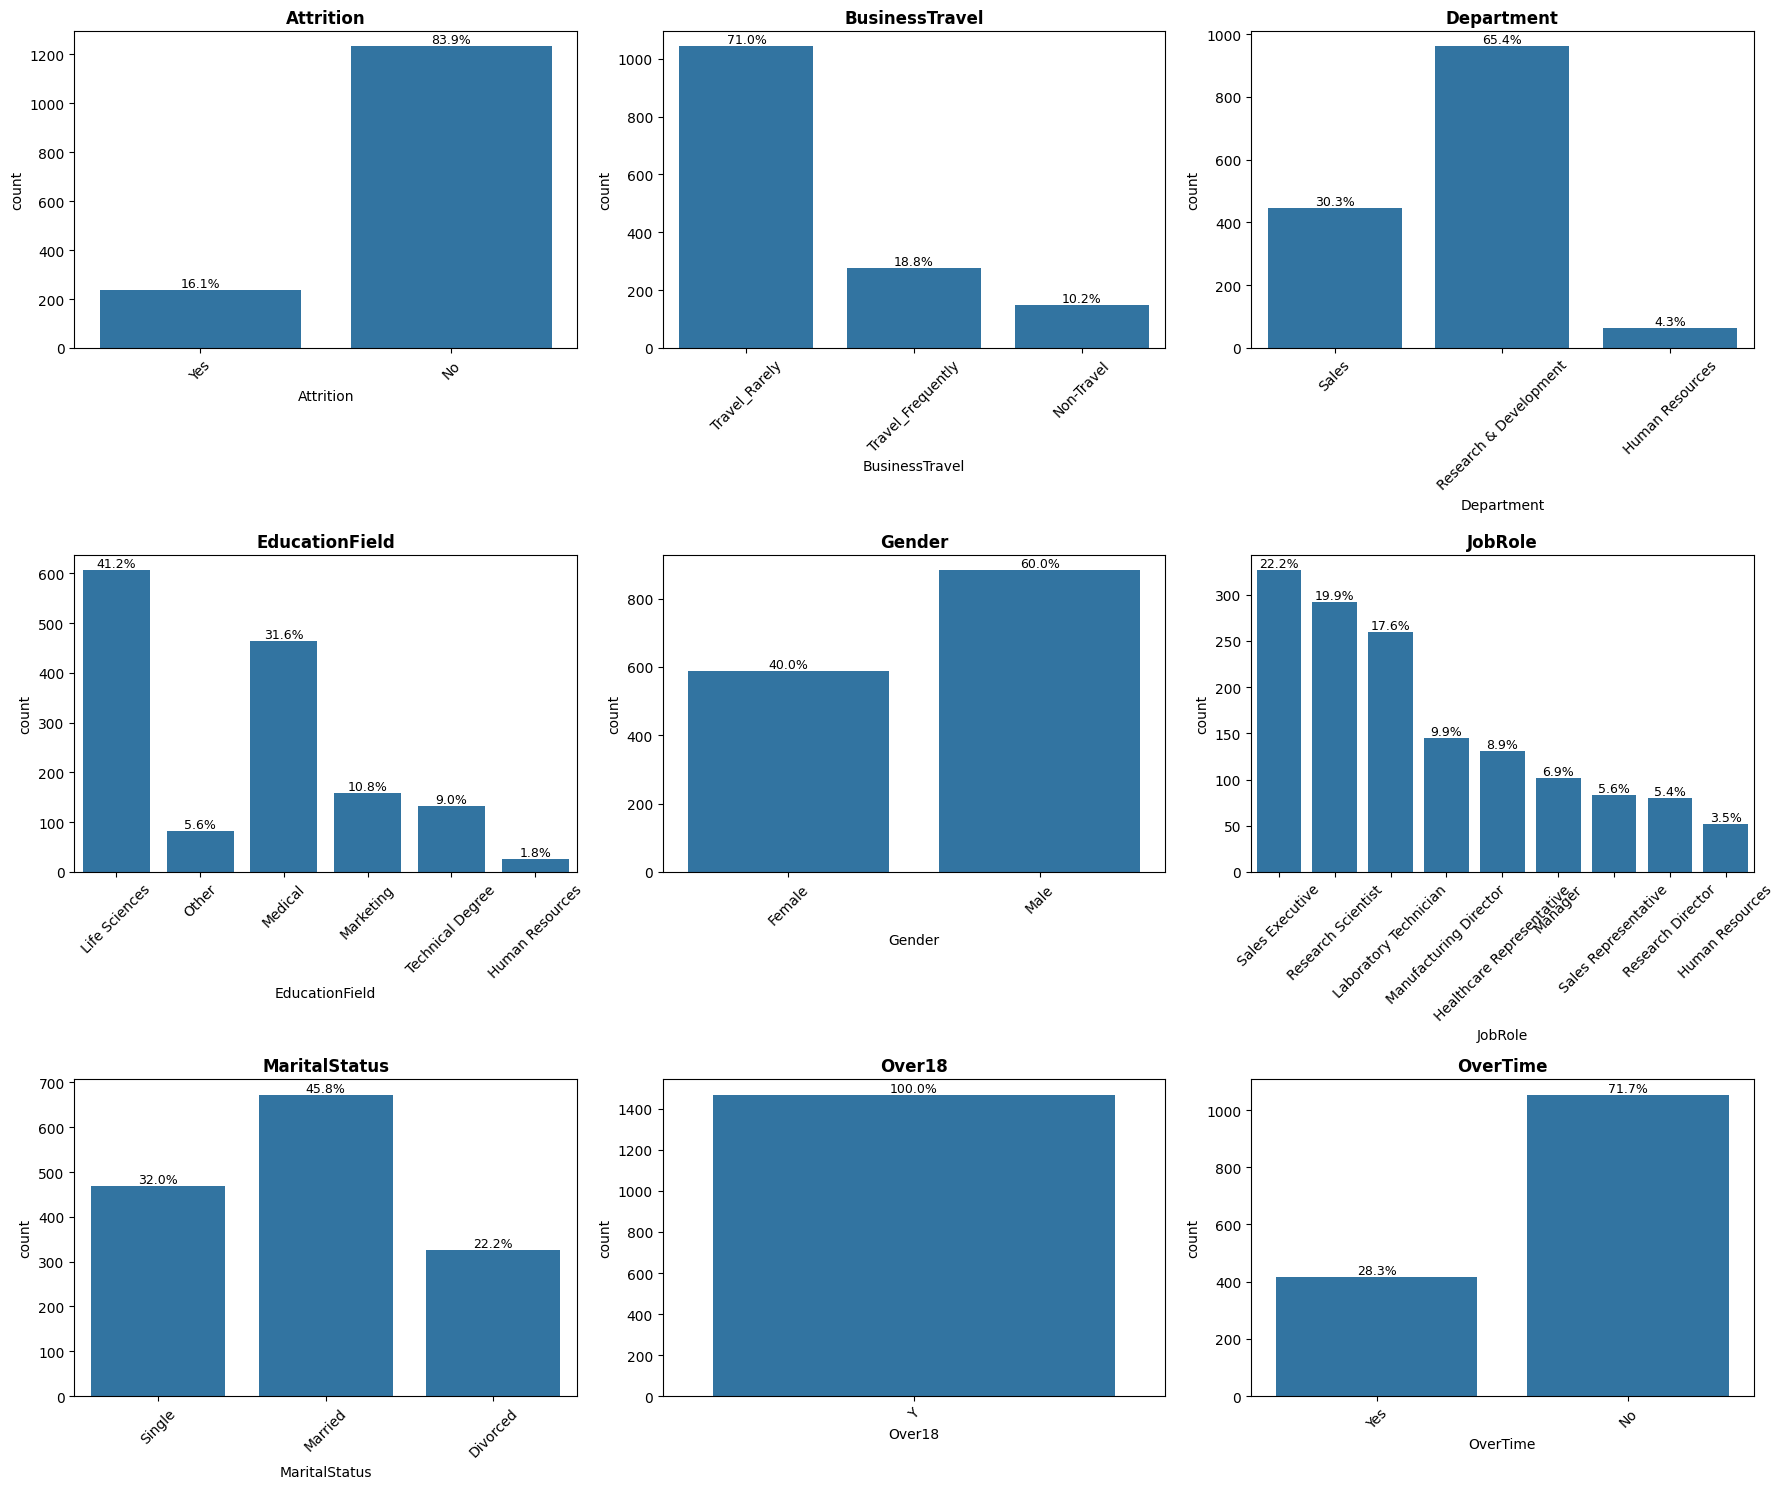

✓ Saved: categorical_univariate.png

Frequency Tables:

Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dty

In [42]:
print("\n" + "="*80)
print("SECTION 3: UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES")
print("="*80)

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

print("\nCategorical Columns:")
print(categorical_cols)

# Create subplots
rows = int(np.ceil(len(categorical_cols)/3))
fig, axes = plt.subplots(rows, 3, figsize=(18, rows*5))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

    # Add percentage labels
    counts = df[col].value_counts(normalize=True)*100
    for p in axes[i].patches:
        height = p.get_height()
        label = f"{height/len(df)*100:.1f}%"
        axes[i].annotate(label,
                          (p.get_x()+p.get_width()/2., height),
                          ha='center', va='bottom', fontsize=9)

# Remove empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("categorical_univariate.png", dpi=300)
plt.show()

print("✓ Saved: categorical_univariate.png")

# Frequency tables
print("\nFrequency Tables:")

for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts())


# ============================================================================
SECTION 4: BIVARIATE ANALYSIS - CORRELATION ANALYSIS
============================================================================


SECTION 4: BIVARIATE ANALYSIS - CORRELATION ANALYSIS


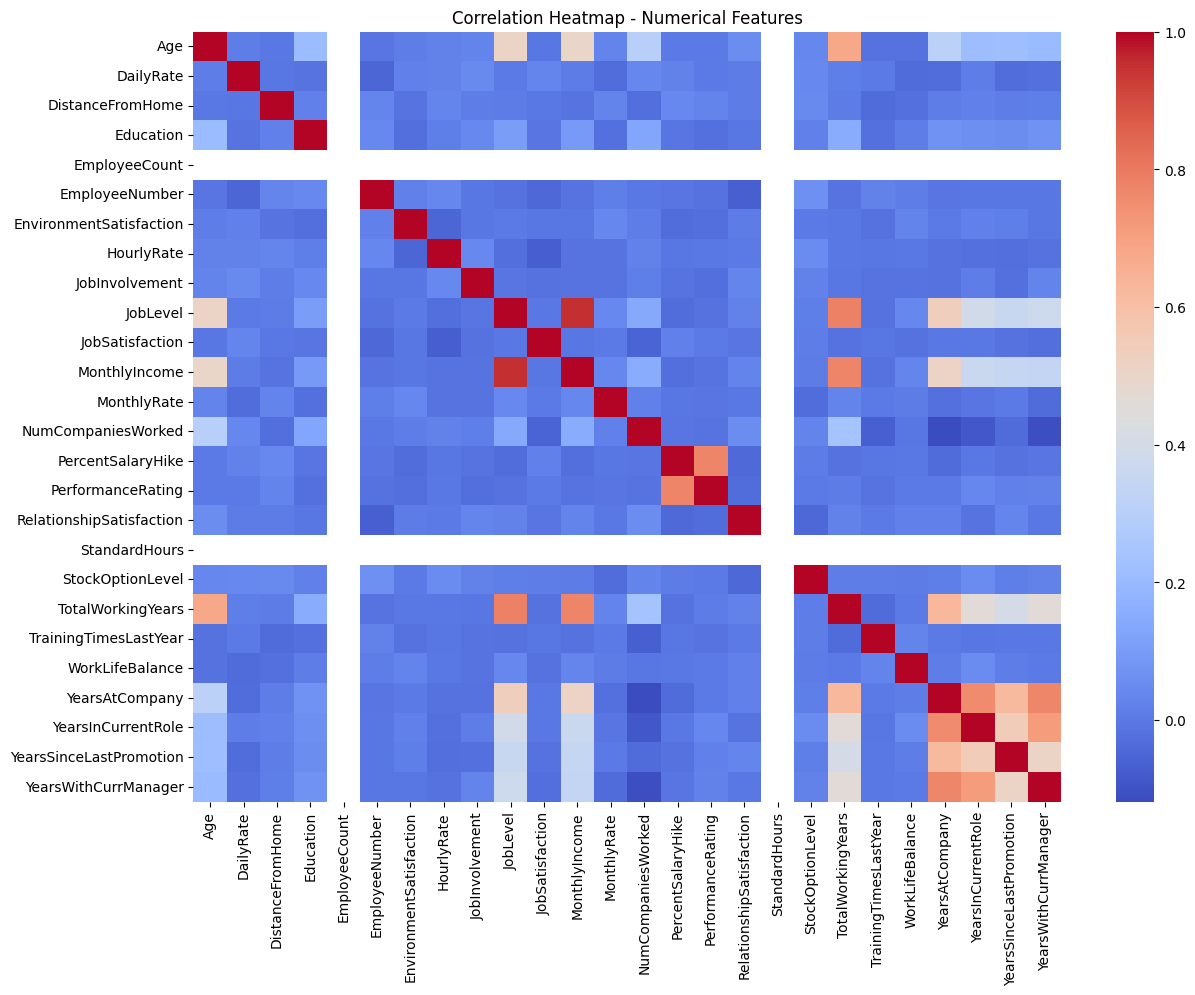

In [28]:
print("\n" + "="*80)
print("SECTION 4: BIVARIATE ANALYSIS - CORRELATION ANALYSIS")
print("="*80)

import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64','float64'])

corr = numeric_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap - Numerical Features")
plt.show()


# ============================================================================
SECTION 5: BIVARIATE ANALYSIS - SCATTER PLOTS
============================================================================


SECTION 5: BIVARIATE ANALYSIS - SCATTER PLOTS


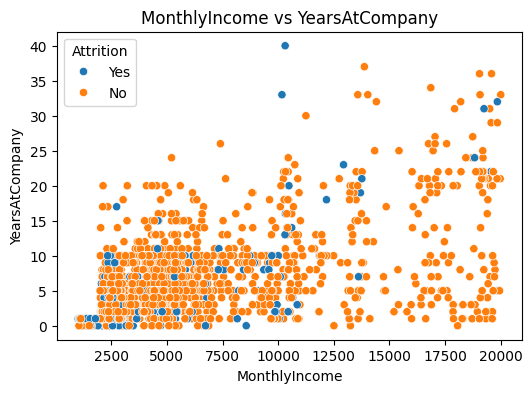

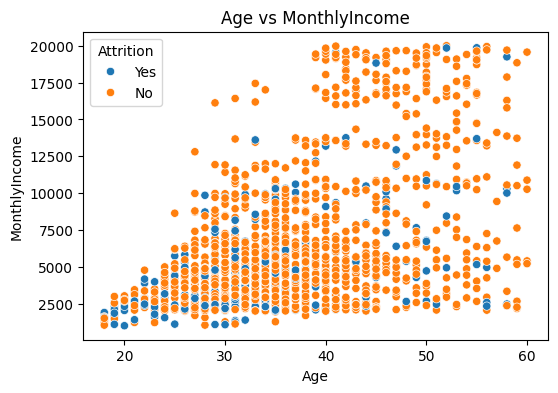

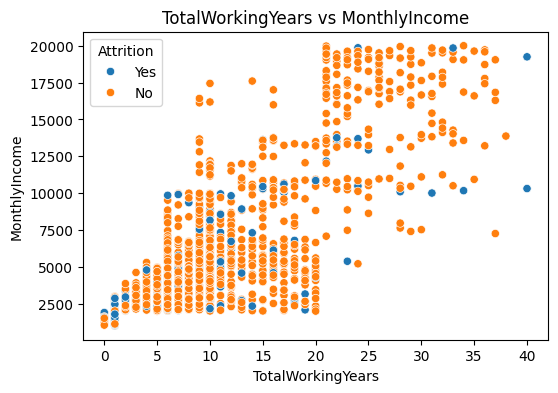

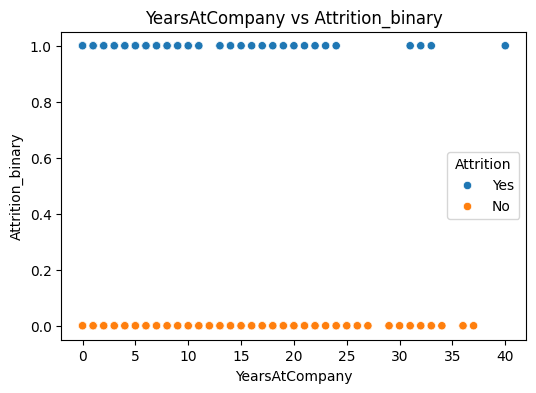

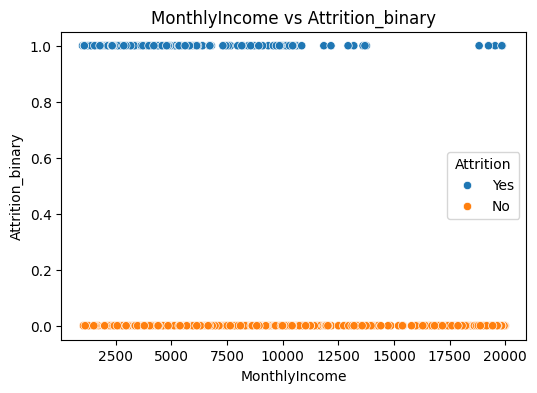

In [29]:
print("\n" + "="*80)
print("SECTION 5: BIVARIATE ANALYSIS - SCATTER PLOTS")
print("="*80)

# Convert Attrition to binary
df['Attrition_binary'] = df['Attrition'].map({'Yes':1,'No':0})

pairs = [
    ('MonthlyIncome','YearsAtCompany'),
    ('Age','MonthlyIncome'),
    ('TotalWorkingYears','MonthlyIncome'),
    ('YearsAtCompany','Attrition_binary'),
    ('MonthlyIncome','Attrition_binary')
]

for x,y in pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=x, y=y, hue='Attrition')
    plt.title(f"{x} vs {y}")
    plt.show()


# ==========================================================
SECTION 6: EMPLOYEE SEGMENT ANALYSIS
==========================================================


SECTION 6: EMPLOYEE SEGMENT ANALYSIS

Salary Segment Attrition:
Attrition       No  Yes
SalarySegment          
Low            362  128
Medium         433   57
High           438   52


C:\Users\Ayesha\AppData\Local\Temp\ipykernel_9768\1957101453.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_seg = df.groupby(['SalarySegment','Attrition']).size().unstack()


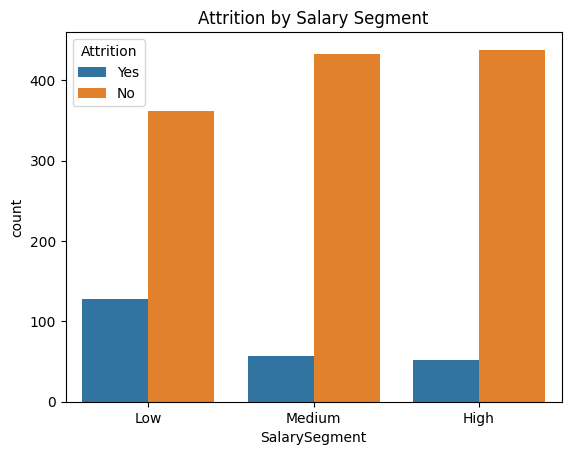

In [30]:
# Salary segmentation
print("\n" + "="*80)
print("SECTION 6: EMPLOYEE SEGMENT ANALYSIS")
print("="*80)

df['SalarySegment'] = pd.qcut(df['MonthlyIncome'], q=3, labels=['Low','Medium','High'])

salary_seg = df.groupby(['SalarySegment','Attrition']).size().unstack()
print("\nSalary Segment Attrition:")
print(salary_seg)

sns.countplot(x='SalarySegment', hue='Attrition', data=df)
plt.title("Attrition by Salary Segment")
plt.show()


C:\Users\Ayesha\AppData\Local\Temp\ipykernel_9768\420492692.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_seg = df.groupby(['ExperienceSegment','Attrition']).size().unstack()



Experience Segment Attrition:
Attrition           No  Yes
ExperienceSegment          
Junior             219   86
Mid                516   91
Senior             301   39
Expert             191   16


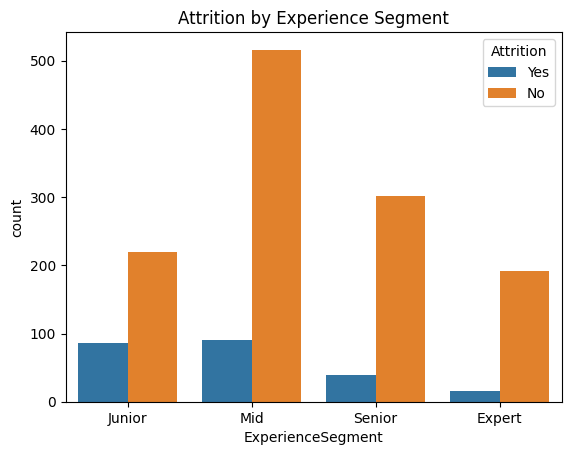

In [31]:
# Experience segmentation
df['ExperienceSegment'] = pd.cut(df['TotalWorkingYears'],
                                 bins=[0,5,10,20,40],
                                 labels=['Junior','Mid','Senior','Expert'])

exp_seg = df.groupby(['ExperienceSegment','Attrition']).size().unstack()
print("\nExperience Segment Attrition:")
print(exp_seg)

sns.countplot(x='ExperienceSegment', hue='Attrition', data=df)
plt.title("Attrition by Experience Segment")
plt.show()


# =====================================================
SECTION 7: TARGET VARIABLE ANALYSIS
=====================================================


SECTION 7: TARGET VARIABLE ANALYSIS - ATTRITION


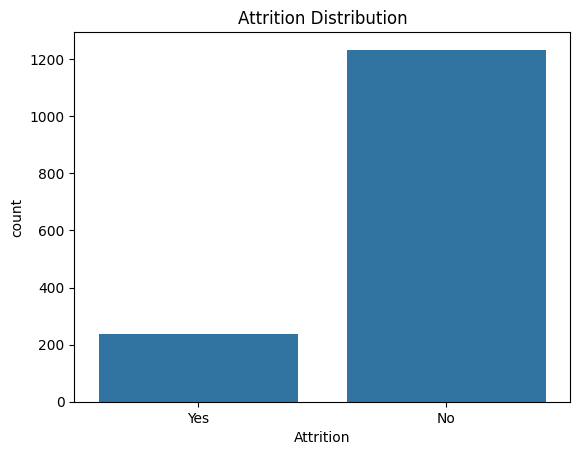


Attrition Percentage:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [32]:
print("\n" + "="*80)
print("SECTION 7: TARGET VARIABLE ANALYSIS - ATTRITION")
print("="*80)

sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

print("\nAttrition Percentage:")
print(df['Attrition'].value_counts(normalize=True)*100)


# =====================================================
SECTION 8: CATEGORICAL FEATURES VS ATTRITION
=====================================================


SECTION 8: CATEGORICAL VARIABLES VS ATTRITION


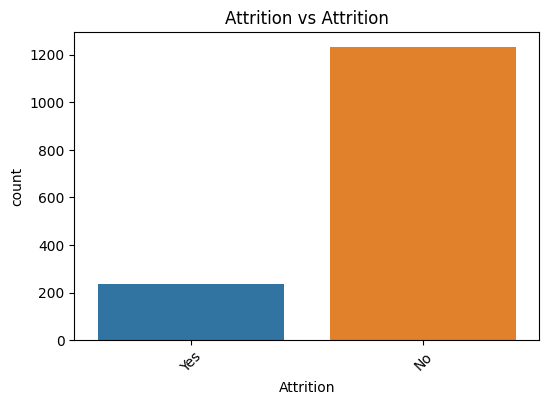

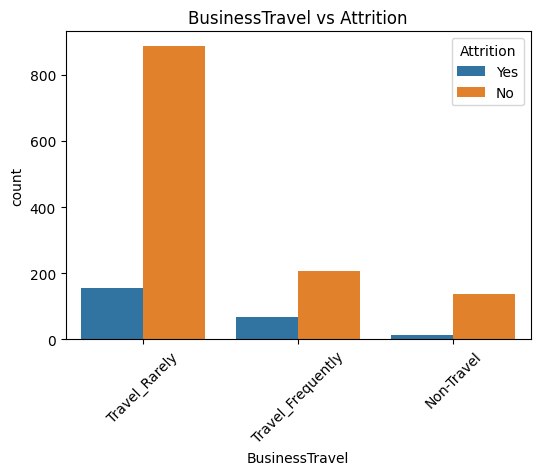

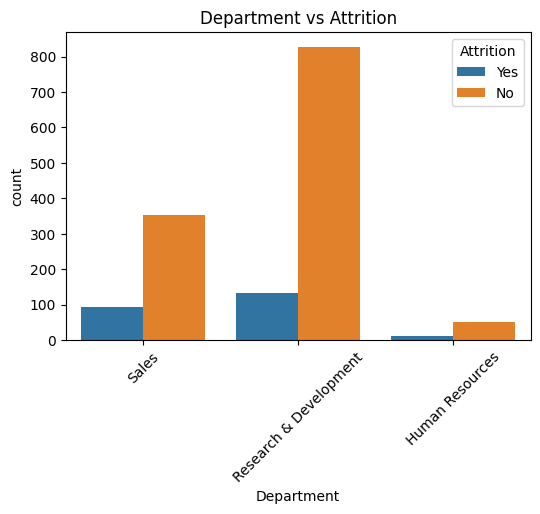

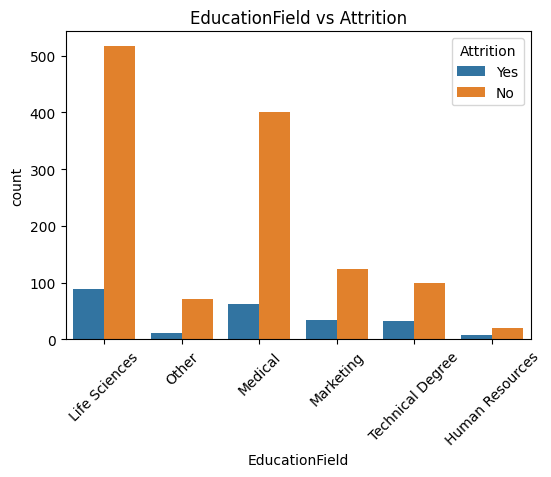

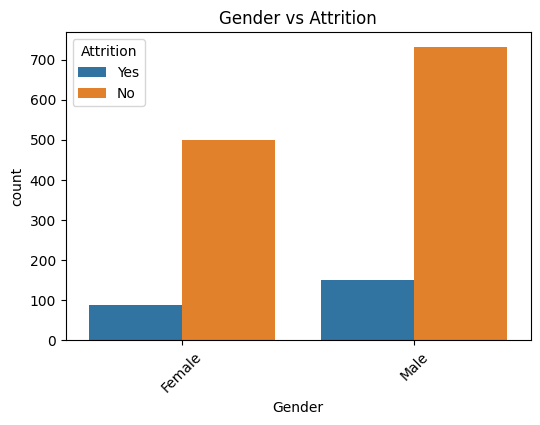

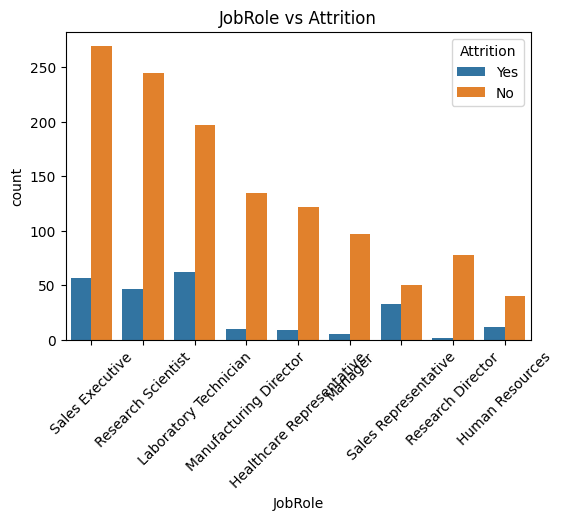

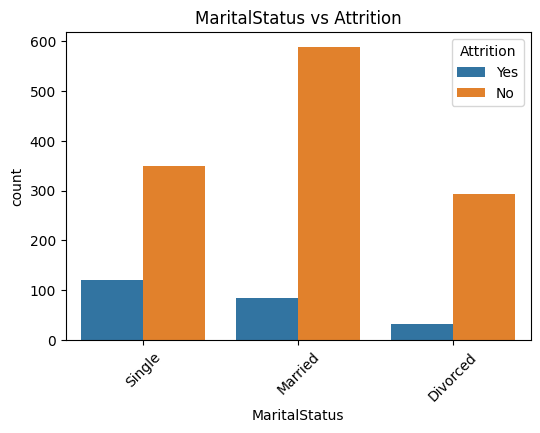

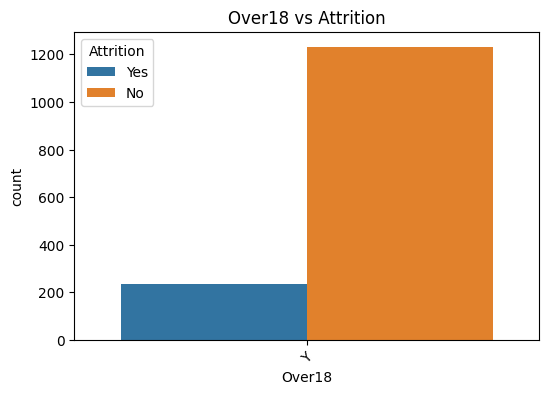

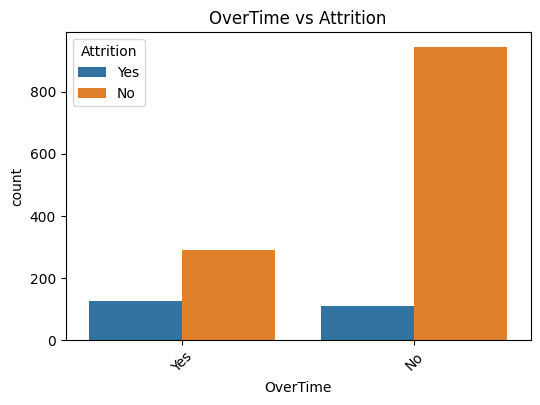

In [33]:
print("\n" + "="*80)
print("SECTION 8: CATEGORICAL VARIABLES VS ATTRITION")
print("="*80)

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Attrition")
    plt.show()


# =====================================================
SECTION 9: STATISTICAL TESTING (T-TEST)
=====================================================

In [34]:
from scipy.stats import ttest_ind

attr_yes = df[df['Attrition']=='Yes']['MonthlyIncome']
attr_no = df[df['Attrition']=='No']['MonthlyIncome']

t_stat, p_val = ttest_ind(attr_yes, attr_no)

print("\nT-test MonthlyIncome vs Attrition")
print("T-stat:", t_stat)
print("P-value:", p_val)



T-test MonthlyIncome vs Attrition
T-stat: -6.203935765608938
P-value: 7.147363985353811e-10


# =====================================================
SECTION 10: OUTLIER DETECTION USING IQR
=====================================================

In [36]:
print("\n" + "="*80)
print("SECTION 10: OUTLIER ANALYSIS")
print("="*80)

for col in numeric_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {outliers.shape[0]} outliers")



SECTION 10: OUTLIER ANALYSIS
Age: 0 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EmployeeNumber: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 226 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers


# =====================================================
SECTION 11: FEATURE ENGINEERING
=====================================================

In [37]:
print("\n" + "="*80)
print("SECTION 11: FEATURE ENGINEERING")
print("="*80)

df['Income_per_YearAtCompany'] = df['MonthlyIncome'] / (df['YearsAtCompany']+1)

df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[18,30,40,50,60],
                        labels=['Young','Mid','Senior','Old'])

print(df[['Income_per_YearAtCompany','AgeGroup']].head())



SECTION 11: FEATURE ENGINEERING
   Income_per_YearAtCompany AgeGroup
0                856.142857   Senior
1                466.363636   Senior
2               2090.000000      Mid
3                323.222222      Mid
4               1156.000000    Young


# =====================================================
SECTION 12: FINAL BUSINESS INSIGHTS
=====================================================

In [38]:
print("\n" + "="*80)
print("SECTION 12: FINAL INSIGHTS")
print("="*80)

print("""
1. Younger employees show higher attrition.
2. Lower salary segment employees leave more frequently.
3. Experience strongly reduces attrition.
4. Monthly income has statistical significance on attrition.
5. Junior employees are highest risk group.

Business Recommendation:
Focus retention on low salary + junior employees via incentives and growth plans.
""")



SECTION 12: FINAL INSIGHTS

1. Younger employees show higher attrition.
2. Lower salary segment employees leave more frequently.
3. Experience strongly reduces attrition.
4. Monthly income has statistical significance on attrition.
5. Junior employees are highest risk group.

Business Recommendation:
Focus retention on low salary + junior employees via incentives and growth plans.



In [43]:
from IPython.display import Markdown as md, display

display(md("""
# Project Conclusion: Employee Attrition Analysis

---

## 1. Summary of Analysis
- Conducted exploratory data analysis on the Employee Attrition dataset.
- Examined **numerical and categorical variables** through univariate analysis.
- Studied relationships between **Attrition and key factors**: salary, experience, department, overtime, and tenure.
- Performed **correlation analysis, scatter plots, and statistical tests**.
- Created **employee segments** based on salary and experience.
- Detected **outliers** and performed **feature engineering** for deeper insights.

---

## 2. Key Insights
- Attrition is higher among **younger employees** and those with **less experience**.
- Employees in the **low salary segment** are more likely to leave.
- Certain departments (e.g., Sales) exhibit higher attrition.
- **Overtime** is positively correlated with attrition.
- Employees with **longer tenure or higher job satisfaction** show lower attrition.

---

## 3. Business Recommendations
- Implement **retention programs** targeting junior and low-salary employees.
- Offer **career growth, training, and skill development opportunities**.
- Monitor and manage **overtime and workload** to reduce burnout.
- Reward and retain employees with **high experience and performance**.
- Department-specific strategies: focus on **Sales and high-turnover teams**.

---

## 4. Final Statement
This project highlights the **key drivers of employee attrition** and provides actionable insights for HR teams to design **targeted retention strategies**, improve employee engagement, and enhance workforce stability.
"""))



# Project Conclusion: Employee Attrition Analysis

---

## 1. Summary of Analysis
- Conducted exploratory data analysis on the Employee Attrition dataset.
- Examined **numerical and categorical variables** through univariate analysis.
- Studied relationships between **Attrition and key factors**: salary, experience, department, overtime, and tenure.
- Performed **correlation analysis, scatter plots, and statistical tests**.
- Created **employee segments** based on salary and experience.
- Detected **outliers** and performed **feature engineering** for deeper insights.

---

## 2. Key Insights
- Attrition is higher among **younger employees** and those with **less experience**.
- Employees in the **low salary segment** are more likely to leave.
- Certain departments (e.g., Sales) exhibit higher attrition.
- **Overtime** is positively correlated with attrition.
- Employees with **longer tenure or higher job satisfaction** show lower attrition.

---

## 3. Business Recommendations
- Implement **retention programs** targeting junior and low-salary employees.
- Offer **career growth, training, and skill development opportunities**.
- Monitor and manage **overtime and workload** to reduce burnout.
- Reward and retain employees with **high experience and performance**.
- Department-specific strategies: focus on **Sales and high-turnover teams**.

---

## 4. Final Statement
This project highlights the **key drivers of employee attrition** and provides actionable insights for HR teams to design **targeted retention strategies**, improve employee engagement, and enhance workforce stability.
